In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True, dtype=int)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Exited']),df['Exited'],test_size=0.2,random_state=1)

In [12]:
X_train.shape

(8000, 11)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model =  Sequential()

# hidden layer with 3 perceptrons.
model.add(Dense(3,activation='relu',input_dim=11))
# output layer with 1 perceptron.
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [19]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6339
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5597
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5160
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4839
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4693
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4474
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4494
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4447
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4335
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4249


In [20]:
model.layers[0].get_weights()

# 11x3 weights, 3 bias.

[array([[-0.11941014,  0.158854  ,  0.24139287],
        [ 0.99327993,  0.65118575, -0.21837609],
        [-0.13632013, -0.06960788, -0.02370008],
        [ 0.56346196, -0.26630387, -0.08867194],
        [ 0.5838117 , -1.3059312 , -0.23958243],
        [ 0.43855795,  0.27378923,  0.48365816],
        [-0.14834192, -0.09866942,  0.85720813],
        [ 0.36584282,  0.2930415 ,  0.4065988 ],
        [ 0.4964893 ,  0.46282282, -0.07170384],
        [ 0.23662078,  0.41878843,  0.40269744],
        [-0.12716648, -0.07330674,  0.32447764]], dtype=float32),
 array([0.00935237, 0.00580294, 1.008587  ], dtype=float32)]

In [21]:
model.layers[1].get_weights()

# 3x1 weights, 1 bias.

[array([[ 0.25476903],
        [ 0.64195865],
        [-0.79241806]], dtype=float32),
 array([-1.1561724], dtype=float32)]

In [22]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
y_pred = np.where(y_log>0.5,1,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

81.8

In [26]:
model2 =  Sequential()

# hidden layer with 11 perceptrons.
model2.add(Dense(11,activation='relu',input_dim=11))
# second hidden layer with 11 perceptrons.
model2.add(Dense(11,activation='relu'))
# output layer with 1 perceptron.
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model2.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6998 - loss: 0.5878 - val_accuracy: 0.8025 - val_loss: 0.4817
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4715 - val_accuracy: 0.8119 - val_loss: 0.4503
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8102 - loss: 0.4374 - val_accuracy: 0.8138 - val_loss: 0.4387
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.4327 - val_accuracy: 0.8125 - val_loss: 0.4307
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.4113 - val_accuracy: 0.8175 - val_loss: 0.4226
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4232 - val_accuracy: 0.8231 - val_loss: 0.4139
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.3905 - val_accuracy: 0.8269 - val_loss: 0.4050
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3826 - val_accu

In [30]:
model2.layers[0].get_weights()

[array([[ 1.47370487e-01,  3.34401637e-01,  1.96629893e-02,
         -5.21335974e-02, -2.24574059e-01,  8.09428394e-01,
         -1.30927697e-01, -3.43486935e-01, -1.87127382e-01,
         -1.95252653e-02,  2.85297483e-02],
        [ 3.27730209e-01, -5.91267824e-01, -3.28591973e-01,
          3.46322834e-01,  7.72795528e-02, -3.43984962e-02,
         -5.11335731e-01,  1.25985742e-01,  9.87613380e-01,
          7.31300056e-01, -9.38153684e-01],
        [-1.17340749e-02, -2.08265319e-01,  4.27792609e-01,
          2.02369560e-02, -3.01596373e-01, -6.89862549e-01,
          6.99527085e-01,  1.74208254e-01,  1.42649631e-04,
         -8.23879614e-02, -1.75597653e-01],
        [-7.30153695e-02, -2.40065888e-01,  2.35551298e-01,
          4.50098008e-01, -5.20230055e-01, -4.11606245e-02,
         -6.32319599e-02,  1.38089983e-02, -2.10545920e-02,
          5.83716966e-02, -1.18557014e-01],
        [-1.27306819e+00, -1.05200715e-01,  2.15483442e-01,
          1.38110888e+00, -5.50105751e-01,  

In [31]:
y_log = model2.predict(X_test_scaled)
y_pred = np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [33]:
accuracy_score(y_test,y_pred)*100

85.9

In [34]:
import matplotlib.pyplot as plt

In [36]:
history.history

{'accuracy': [0.7604687213897705,
  0.8043749928474426,
  0.8173437714576721,
  0.8220312595367432,
  0.8276562690734863,
  0.8339062333106995,
  0.8382812738418579,
  0.8412500023841858,
  0.8470312356948853,
  0.8485937714576721,
  0.852343738079071,
  0.8545312285423279,
  0.8550000190734863,
  0.8576562404632568,
  0.8579687476158142,
  0.8600000143051147,
  0.8609374761581421,
  0.8587499856948853,
  0.8615624904632568,
  0.8618749976158142,
  0.8603125214576721,
  0.8643749952316284,
  0.8618749976158142,
  0.8617187738418579,
  0.8621875047683716,
  0.8626562356948853,
  0.8615624904632568,
  0.8631250262260437,
  0.8609374761581421,
  0.8612499833106995,
  0.8631250262260437,
  0.8642187714576721,
  0.8637499809265137,
  0.8623437285423279,
  0.8634374737739563,
  0.8635937571525574,
  0.8631250262260437,
  0.8635937571525574,
  0.86328125,
  0.8629687428474426,
  0.8628125190734863,
  0.8631250262260437,
  0.864062488079071,
  0.8653125166893005,
  0.8656250238418579,
  0.8629

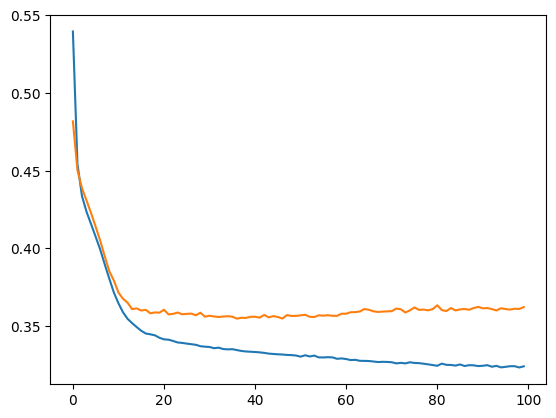

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# gap shows level of overfitting

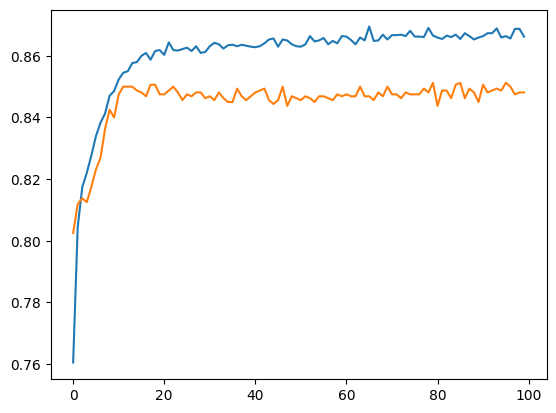

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])